# 6-1. 프로젝트: 인물 모드 문제점 찾기

## Step 1. 인물모드 직접 해 보기

In [86]:
# importlib: 사용자가 파이썬의 import 시스템과 상호작용하기 위한 API를 제공하는 내장 라이브러리
# 사용자는 import 함수의 구현 내용과, 실행에 필요한 하위 함수들을 이용해 필요에 맞는 임포터를 직접 구현하거나 임포트 관련 기능들을 자유롭게 사용할 수 있음
# importlib.metadata: 설치된 패키지 메타 데이터에 대한 접근을 제공하는 라이브러리.
# 해당 코드 블럭에서는 importlib.metadata 안에 있는 version() 함수를 이용하여 pixellib 라이브러리의 버전을 확인

from importlib.metadata import version
import cv2
import pixellib
import os
import urllib
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

print(cv2.__version__)
print(version('pixellib'))

4.5.3
0.7.1


(2576, 1932, 3)
(2160, 2880, 3)
(3088, 2316, 3)


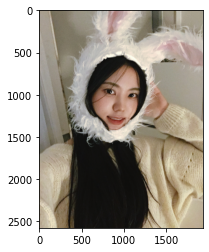

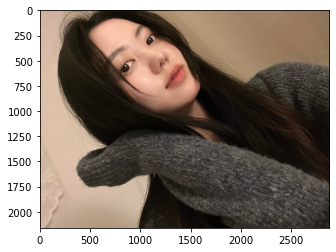

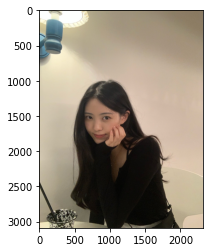

In [87]:
# os 모듈에 있는 getenv() 함수를 이용하여 읽고싶은 파일의 경로를 file_path에 저장
# 준비한 이미지 파일의 경로를 이용하여, 이미지 파일을 읽음
# cv2.imread(경로): 경로에 해당하는 이미지 파일을 읽어서 변수에 저장
img_path1 = os.getenv('HOME')+'/aiffel/human_segmentation_project/images/img1.jpeg'
img_path2 = os.getenv('HOME')+'/aiffel/human_segmentation_project/images/img2.jpeg'  
img_path3 = os.getenv('HOME')+'/aiffel/human_segmentation_project/images/img3.jpeg'  

img_orig1 = cv2.imread(img_path1) 
img_orig2 = cv2.imread(img_path2) 
img_orig3 = cv2.imread(img_path3) 

print(img_orig1.shape)
print(img_orig2.shape)
print(img_orig3.shape)

# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 이미지 색상 채널을 변경 (BGR 형식을 RGB 형식으로 변경)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시, 입력은 RGB(A) 데이터 혹은 2D 스칼라 데이터
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
# plt.show(): 현재 열려있는 모든 figure를 표시 (여기서 figure는 이미지, 그래프 등)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html
plt.imshow(cv2.cvtColor(img_orig1, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_orig2, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_orig3, cv2.COLOR_BGR2RGB))
plt.show()

In [88]:
# 저장할 파일 이름을 결정합니다
# 1. os.getenv(x)함수는 환경 변수x의 값을 포함하는 문자열 변수를 반환합니다. model_dir 에 "/aiffel/human_segmentation/models" 저장
# 2. #os.path.join(a, b)는 경로를 병합하여 새 경로 생성 model_file 에 "/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5" 저장
# 1
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation_project/models' 
# 2
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('/aiffel/aiffel/human_segmentation_project/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f276d57fd00>)

In [89]:
model = semantic_segmentation() #PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model.load_pascalvoc_model(model_file) # pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출

In [90]:
segvalues1, output1 = model.segmentAsPascalvoc(img_path1) # segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용
segvalues2, output2 = model.segmentAsPascalvoc(img_path2)
segvalues3, output3 = model.segmentAsPascalvoc(img_path3)

In [91]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

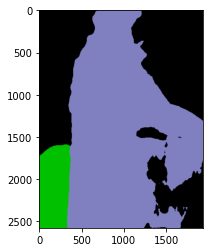

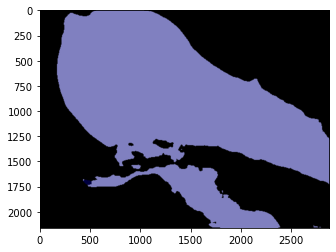

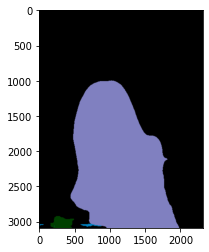

In [92]:
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output1)
plt.show()
plt.imshow(output2)
plt.show()
plt.imshow(output3)
plt.show()

In [93]:
print(segvalues1) # segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력
print(segvalues2)
print(segvalues3)

{'class_ids': array([ 0, 15, 18]), 'masks': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])}
{'class_ids': array([ 0,  8, 15]), 'masks': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])}
{'class_ids': array([ 0, 11, 15, 16]), 'masks': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, Fals

In [94]:
#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues1['class_ids']:
    print(LABEL_NAMES[class_id])
print('-'*45)

for class_id in segvalues2['class_ids']:
    print(LABEL_NAMES[class_id])
print('-'*45)

for class_id in segvalues3['class_ids']:
    print(LABEL_NAMES[class_id])
print('-'*45)


background
person
sofa
---------------------------------------------
background
cat
person
---------------------------------------------
background
diningtable
person
pottedplant
---------------------------------------------


In [95]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!

#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [96]:
colormap[15] #컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)

array([192, 128, 128])

In [97]:
seg_color = (128,128,192) # 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서

(2576, 1932)


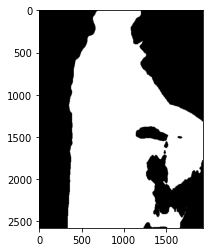

(2160, 2880)


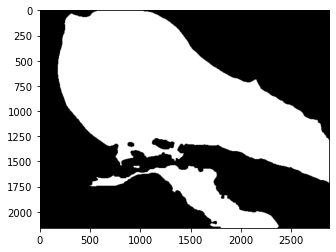

(3088, 2316)


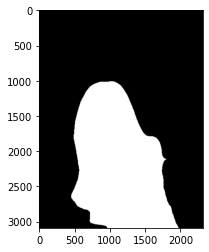

In [98]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map1 = np.all(output1==seg_color, axis=-1) 
print(seg_map1.shape) 
plt.imshow(seg_map1, cmap='gray')
plt.show()

seg_map2 = np.all(output2==seg_color, axis=-1) 
print(seg_map2.shape) 
plt.imshow(seg_map2, cmap='gray')
plt.show()

seg_map3 = np.all(output3==seg_color, axis=-1) 
print(seg_map3.shape) 
plt.imshow(seg_map3, cmap='gray')
plt.show()

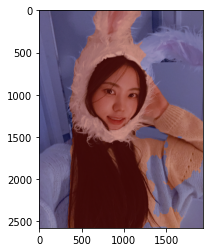

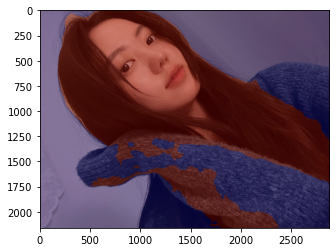

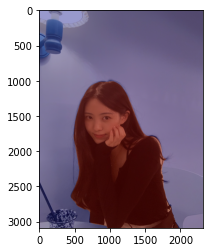

In [99]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig1.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask1 = seg_map1.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask1, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()


img_show = img_orig2.copy()

img_mask2 = seg_map2.astype(np.uint8) * 255

color_mask = cv2.applyColorMap(img_mask2, cv2.COLORMAP_JET)

img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()


img_show = img_orig3.copy()

img_mask3 = seg_map3.astype(np.uint8) * 255

color_mask = cv2.applyColorMap(img_mask3, cv2.COLORMAP_JET)

img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

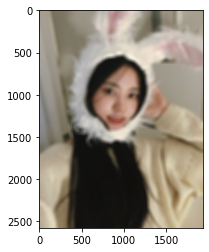

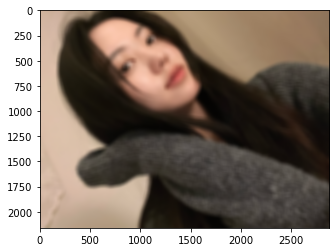

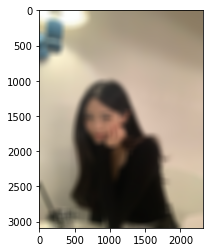

In [100]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur1 = cv2.blur(img_orig1, (50,50))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(img_orig_blur1, cv2.COLOR_BGR2RGB))
plt.show()

img_orig_blur2 = cv2.blur(img_orig2, (50,50))
 
plt.imshow(cv2.cvtColor(img_orig_blur2, cv2.COLOR_BGR2RGB))
plt.show()

img_orig_blur3 = cv2.blur(img_orig3, (100,100))
 
plt.imshow(cv2.cvtColor(img_orig_blur3, cv2.COLOR_BGR2RGB))
plt.show()

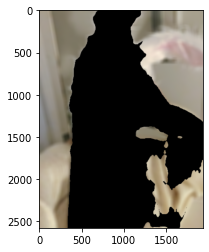

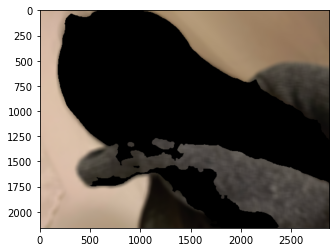

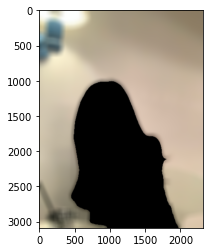

In [104]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color1 = cv2.cvtColor(img_mask1, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask = cv2.bitwise_not(img_mask_color1)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur1 = cv2.bitwise_and(img_orig_blur1, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur1, cv2.COLOR_BGR2RGB))
plt.show()


img_mask_color2 = cv2.cvtColor(img_mask2, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color2)
img_bg_blur2 = cv2.bitwise_and(img_orig_blur2, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur2, cv2.COLOR_BGR2RGB))
plt.show()

img_mask_color3 = cv2.cvtColor(img_mask3, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color3)
img_bg_blur3 = cv2.bitwise_and(img_orig_blur3, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur3, cv2.COLOR_BGR2RGB))
plt.show()

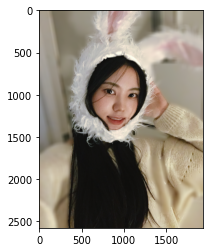

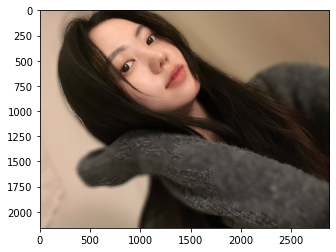

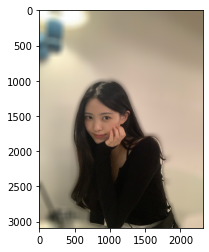

In [108]:
img_mask_color_resized = cv2.resize(img_mask_color1, (img_orig1.shape[1], img_orig1.shape[0]))
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat = np.where(img_mask_color1==255, img_orig1, img_bg_blur1)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

img_mask_color_resized = cv2.resize(img_mask_color2, (img_orig2.shape[1], img_orig2.shape[0]))

img_concat = np.where(img_mask_color2==255, img_orig2, img_bg_blur2)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()


img_mask_color_resized = cv2.resize(img_mask_color3, (img_orig3.shape[1], img_orig3.shape[0]))

img_concat = np.where(img_mask_color3==255, img_orig3, img_bg_blur3)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

## Step 2. 사진에서 문제점 찾기

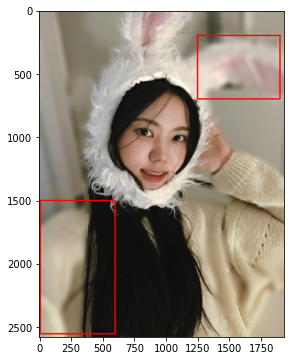

In [165]:
img_mask_color_resized = cv2.resize(img_mask_color1, (img_orig1.shape[1], img_orig1.shape[0]))

img_concat = np.where(img_mask_color1==255, img_orig1, img_bg_blur1)
plt.figure(figsize=(10, 6))
cv2.rectangle(img_concat, (10, 1500), (600, 2550), (0, 0, 255), 10)
cv2.rectangle(img_concat, (1250, 200), (1900, 700), (0, 0, 255), 10)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

사람과 사물의 색상이 비슷해서 제대로 인식하지 못하고 포커싱을 잘못 잡았다

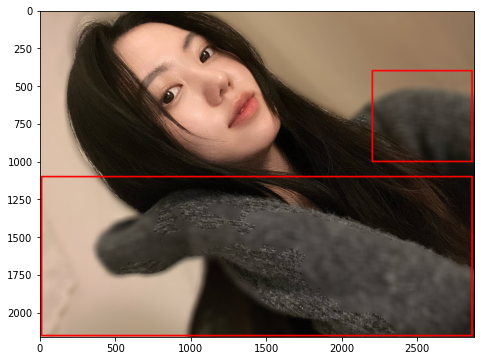

In [164]:
img_mask_color_resized = cv2.resize(img_mask_color2, (img_orig2.shape[1], img_orig2.shape[0]))

img_concat = np.where(img_mask_color2==255, img_orig2, img_bg_blur2)
plt.figure(figsize=(10, 6))
cv2.rectangle(img_concat, (2200, 400), (2860, 1000), (0, 0, 255), 10)
cv2.rectangle(img_concat, (10, 1100), (2860, 2150), (0, 0, 255), 10)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

인물이 얼룩덜룩하게 블러처리가 잘못된 모습을 볼 수 있다

## Step 3. 해결 방법을 제안해 보기


#### 문제점 : 배경과 인물을 정확히 구분하지 못함
#### 해결 방안 : 세그멘테이션 후처리(Post-processing)추가
#### 순서도(Flow Chart) :
1. 경계 부드럽게 하기 (Smoothing):
세그멘테이션 모델의 출력은 픽셀 단위로 예측되므로 경계가 조금 불규칙할 수 있습니다. 이를 부드럽게 하기 위해 모델의 출력을 블러(Blur) 또는 모폴로지 연산 등을 사용하여 부드럽게 만들어 줍니다.

2. 노이즈 제거 (Noise Removal):
세그멘테이션 모델의 출력에 노이즈가 포함되어 있을 수 있습니다. 노이즈를 제거하기 위해 노이즈 제거 기법을 사용하여 세그멘테이션 결과를 깔끔하게 정리할 수 있습니다.

3. 분리된 작은 객체 병합 (Merging Small Objects):
세그멘테이션 모델은 작은 객체를 분리하여 각각 따로 예측할 수 있습니다. 이러한 작은 객체들을 하나로 병합하여 더 큰 객체로 만들어주는 후처리를 수행할 수 있습니다.

4. 확장(Erosion) 및 팽창(Dilation):
세그멘테이션 결과에 객체의 경계가 너무 얇거나 끊어져 있는 경우, 확장과 팽창을 사용하여 경계를 보정할 수 있습니다. 팽창은 객체를 확장시키고, 침식은 객체를 축소시켜 경계를 보정하는데 사용됩니다.

5. 마스킹(Masking):
관심 없는 영역을 마스킹하여 제거하거나, 특정 영역에 대한 세그멘테이션 결과를 변경할 수 있습니다. 이를 통해 세그멘테이션 결과를 원하는 방식으로 가공할 수 있습니다.

6. 패치 기반 후처리 (Patch-based Post-processing):
대규모 이미지에서 세그멘테이션을 적용할 때, 전체 이미지에 대해 한 번에 처리하기 어려운 경우 패치(patch) 단위로 분할하여 후처리를 수행하는 방법을 사용합니다.

7. 픽셀 마스크 조정 (Pixel Mask Refinement):
세그멘테이션 결과를 기반으로 픽셀 단위로 정확한 경계를 추출하고, 경계를 깔끔하게 조정하는 작업을 수행합니다.

8. 픽셀값 수정 (Pixel Value Modification):
세그멘테이션 결과를 사용할 때 픽셀값을 수정하여 추가적인 효과를 줄 수 있습니다. 예를 들어, 객체의 픽셀값을 변경하여 다양한 시각적 효과를 부여할 수 있습니다.